In [35]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [36]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


# Prepare training dataset

In [37]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file input already exists.
Error occurred while processing: input.
A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file outputs already exists.
Error occurred while processing: outputs.


# Generator

In [38]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [39]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [40]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [41]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [42]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [43]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [44]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)

In [45]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [46]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [47]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

  1%|          | 1/117 [00:00<00:41,  2.82it/s]

118it [00:11, 10.56it/s]                         


Epoch 1 of 100
Generator loss: 1.40389430, Discriminator loss: 0.88885372


118it [00:10, 11.21it/s]                         


Epoch 2 of 100
Generator loss: 3.16173946, Discriminator loss: 1.40290465


118it [00:10, 11.09it/s]                         


Epoch 3 of 100
Generator loss: 4.76800464, Discriminator loss: 0.28333074


118it [00:10, 11.15it/s]                         


Epoch 4 of 100
Generator loss: 2.39020693, Discriminator loss: 1.07662589


118it [00:11, 10.59it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


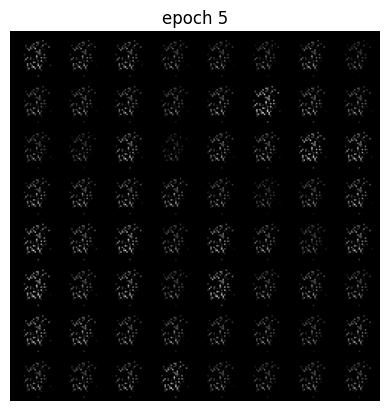

Epoch 5 of 100
Generator loss: 1.91446328, Discriminator loss: 1.08069245


118it [00:11, 10.60it/s]                         


Epoch 6 of 100
Generator loss: 2.39099227, Discriminator loss: 0.90721352


118it [00:10, 11.24it/s]                         


Epoch 7 of 100
Generator loss: 2.33813101, Discriminator loss: 1.01950670


118it [00:10, 10.86it/s]                         


Epoch 8 of 100
Generator loss: 2.11935053, Discriminator loss: 0.92311140


118it [00:10, 10.99it/s]                         


Epoch 9 of 100
Generator loss: 1.95306565, Discriminator loss: 1.08507536


118it [00:10, 11.28it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


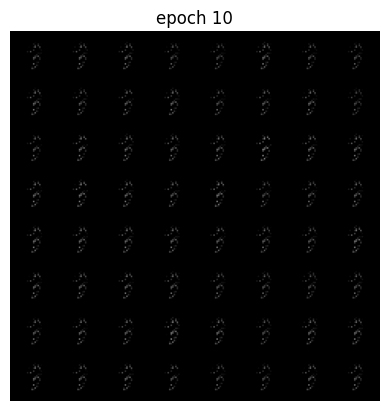

Epoch 10 of 100
Generator loss: 1.61138022, Discriminator loss: 0.97335978


118it [00:10, 11.69it/s]                         


Epoch 11 of 100
Generator loss: 1.58077946, Discriminator loss: 1.13190342


118it [00:10, 11.58it/s]                         


Epoch 12 of 100
Generator loss: 2.88009321, Discriminator loss: 1.25572407


118it [00:10, 11.79it/s]                         


Epoch 13 of 100
Generator loss: 1.04584437, Discriminator loss: 1.17161964


118it [00:09, 11.84it/s]                         


Epoch 14 of 100
Generator loss: 1.17651876, Discriminator loss: 0.99051188


118it [00:10, 11.66it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


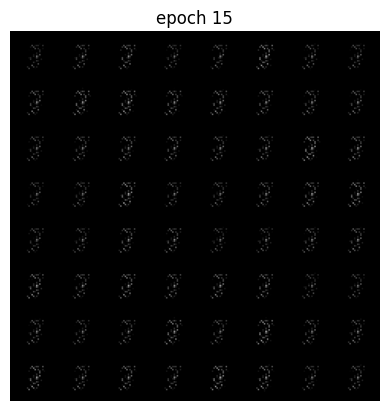

Epoch 15 of 100
Generator loss: 2.80840827, Discriminator loss: 0.92514654


118it [00:10, 10.94it/s]                         


Epoch 16 of 100
Generator loss: 1.35402315, Discriminator loss: 1.06219947


118it [00:10, 11.54it/s]                         


Epoch 17 of 100
Generator loss: 1.59375069, Discriminator loss: 0.92582005


118it [00:10, 11.37it/s]                         


Epoch 18 of 100
Generator loss: 1.79372713, Discriminator loss: 0.88975545


118it [00:10, 11.34it/s]                         


Epoch 19 of 100
Generator loss: 3.81375053, Discriminator loss: 0.73125575


118it [00:10, 11.40it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


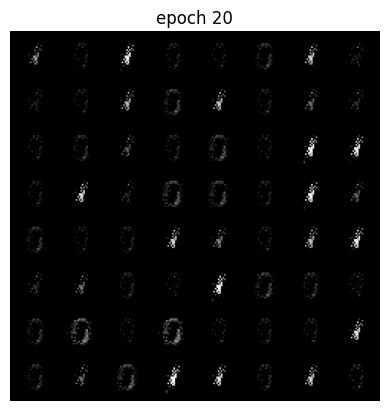

Epoch 20 of 100
Generator loss: 3.16840452, Discriminator loss: 0.51596745


118it [00:10, 11.80it/s]                         


Epoch 21 of 100
Generator loss: 3.04818319, Discriminator loss: 0.51401360


118it [00:10, 11.48it/s]                         


Epoch 22 of 100
Generator loss: 3.52490557, Discriminator loss: 0.40885742


118it [00:09, 12.16it/s]                         


Epoch 23 of 100
Generator loss: 2.97233630, Discriminator loss: 0.62651929


118it [00:10, 11.60it/s]                         


Epoch 24 of 100
Generator loss: 3.20005525, Discriminator loss: 0.61781943


118it [00:10, 11.65it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


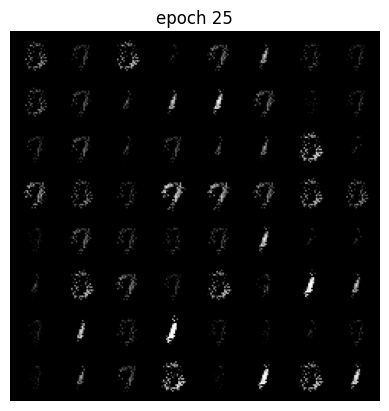

Epoch 25 of 100
Generator loss: 2.62422047, Discriminator loss: 0.68901844


118it [00:10, 11.67it/s]                         


Epoch 26 of 100
Generator loss: 3.20944639, Discriminator loss: 0.59784900


118it [00:10, 10.94it/s]                         


Epoch 27 of 100
Generator loss: 3.18292522, Discriminator loss: 0.59257419


118it [00:10, 11.43it/s]                         


Epoch 28 of 100
Generator loss: 3.74968834, Discriminator loss: 0.44742357


118it [00:10, 11.60it/s]                         


Epoch 29 of 100
Generator loss: 3.34188608, Discriminator loss: 0.47774692


118it [00:10, 11.65it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


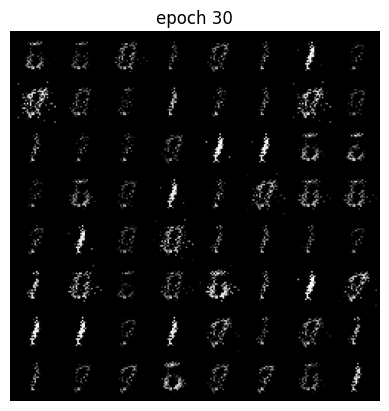

Epoch 30 of 100
Generator loss: 3.30842274, Discriminator loss: 0.45648618


118it [00:10, 11.65it/s]                         


Epoch 31 of 100
Generator loss: 3.69831692, Discriminator loss: 0.32730839


118it [00:10, 11.68it/s]                         


Epoch 32 of 100
Generator loss: 3.86772508, Discriminator loss: 0.36047367


118it [00:10, 11.32it/s]                         


Epoch 33 of 100
Generator loss: 3.29628849, Discriminator loss: 0.47755902


118it [00:10, 11.76it/s]                         


Epoch 34 of 100
Generator loss: 2.87238079, Discriminator loss: 0.58036334


118it [00:10, 11.46it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


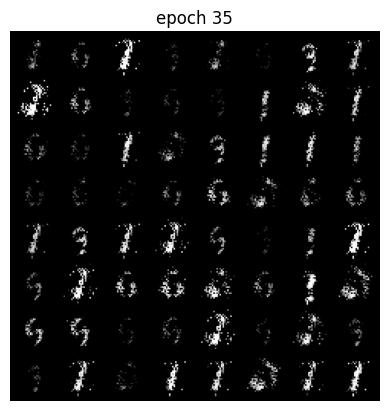

Epoch 35 of 100
Generator loss: 3.26228198, Discriminator loss: 0.47677032


118it [00:10, 11.42it/s]                         


Epoch 36 of 100
Generator loss: 3.03446384, Discriminator loss: 0.49380303


118it [00:10, 11.14it/s]                         


Epoch 37 of 100
Generator loss: 2.81994308, Discriminator loss: 0.55255778


118it [00:10, 11.54it/s]                         


Epoch 38 of 100
Generator loss: 3.44509273, Discriminator loss: 0.42978428


118it [00:10, 11.18it/s]                         


Epoch 39 of 100
Generator loss: 3.35257796, Discriminator loss: 0.42616923


118it [00:10, 11.32it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


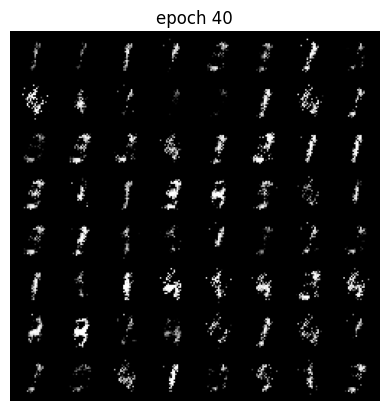

Epoch 40 of 100
Generator loss: 3.57743321, Discriminator loss: 0.44301643


118it [00:10, 11.14it/s]                         


Epoch 41 of 100
Generator loss: 3.57060823, Discriminator loss: 0.46506757


118it [00:10, 11.42it/s]                         


Epoch 42 of 100
Generator loss: 3.23286011, Discriminator loss: 0.41243307


118it [00:10, 10.87it/s]                         


Epoch 43 of 100
Generator loss: 3.63082996, Discriminator loss: 0.35840312


118it [00:10, 11.52it/s]                         


Epoch 44 of 100
Generator loss: 3.26646919, Discriminator loss: 0.46358468


118it [00:10, 11.30it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


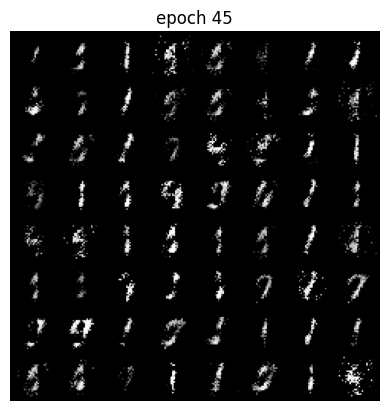

Epoch 45 of 100
Generator loss: 2.86217979, Discriminator loss: 0.52685988


118it [00:10, 11.57it/s]                         


Epoch 46 of 100
Generator loss: 2.90232869, Discriminator loss: 0.53718925


118it [00:10, 11.34it/s]                         


Epoch 47 of 100
Generator loss: 2.99163802, Discriminator loss: 0.52791426


118it [00:10, 11.39it/s]                         


Epoch 48 of 100
Generator loss: 3.00394447, Discriminator loss: 0.48933916


118it [00:10, 11.30it/s]                         


Epoch 49 of 100
Generator loss: 3.03088396, Discriminator loss: 0.45046421


118it [00:10, 11.16it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


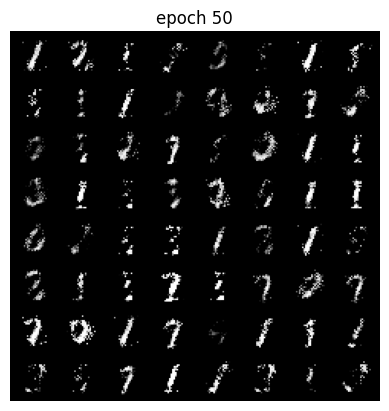

Epoch 50 of 100
Generator loss: 2.72770440, Discriminator loss: 0.60653170


118it [00:10, 11.37it/s]                         


Epoch 51 of 100
Generator loss: 2.91153094, Discriminator loss: 0.53597126


118it [00:10, 10.86it/s]                         


Epoch 52 of 100
Generator loss: 2.61616253, Discriminator loss: 0.57359535


118it [00:10, 10.93it/s]                         


Epoch 53 of 100
Generator loss: 2.70497410, Discriminator loss: 0.57085837


118it [00:10, 11.19it/s]                         


Epoch 54 of 100
Generator loss: 2.81231954, Discriminator loss: 0.62553681


118it [00:10, 11.57it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


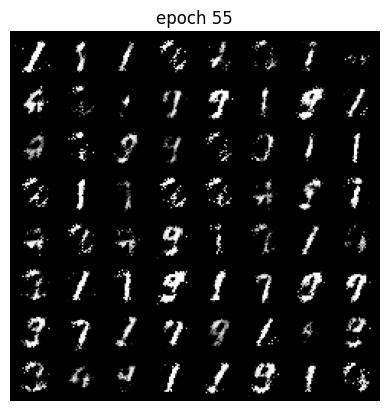

Epoch 55 of 100
Generator loss: 2.64444889, Discriminator loss: 0.59418987


118it [00:10, 11.58it/s]                         


Epoch 56 of 100
Generator loss: 2.84376657, Discriminator loss: 0.50114036


118it [00:10, 11.24it/s]                         


Epoch 57 of 100
Generator loss: 2.70881812, Discriminator loss: 0.53633541


118it [00:10, 11.09it/s]                         


Epoch 58 of 100
Generator loss: 2.64672930, Discriminator loss: 0.56702479


118it [00:11, 10.71it/s]                         


Epoch 59 of 100
Generator loss: 2.79011365, Discriminator loss: 0.56965054


118it [00:10, 11.71it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


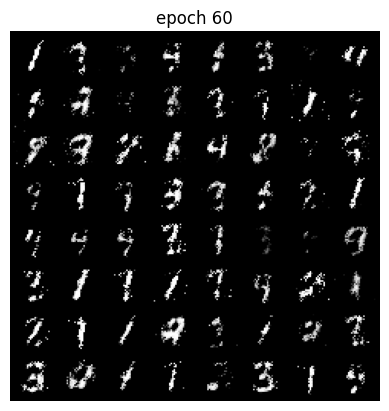

Epoch 60 of 100
Generator loss: 2.71242966, Discriminator loss: 0.56355585


118it [00:10, 11.45it/s]                         


Epoch 61 of 100
Generator loss: 2.91646524, Discriminator loss: 0.53974166


118it [00:09, 11.84it/s]                         


Epoch 62 of 100
Generator loss: 2.71611257, Discriminator loss: 0.57743987


118it [00:10, 11.57it/s]                         


Epoch 63 of 100
Generator loss: 2.72646812, Discriminator loss: 0.56739411


118it [00:10, 11.64it/s]                         


Epoch 64 of 100
Generator loss: 2.72527885, Discriminator loss: 0.51918828


118it [00:10, 11.25it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


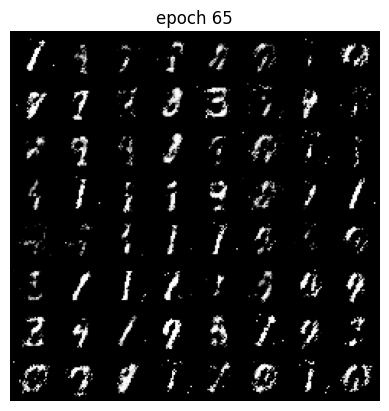

Epoch 65 of 100
Generator loss: 2.98033214, Discriminator loss: 0.51364340


118it [00:10, 11.44it/s]                         


Epoch 66 of 100
Generator loss: 2.77991739, Discriminator loss: 0.55288011


118it [00:10, 11.20it/s]                         


Epoch 67 of 100
Generator loss: 2.60176950, Discriminator loss: 0.60378562


118it [00:10, 11.39it/s]                         


Epoch 68 of 100
Generator loss: 2.68090084, Discriminator loss: 0.55769544


118it [00:10, 10.98it/s]                         


Epoch 69 of 100
Generator loss: 2.78481450, Discriminator loss: 0.54453221


118it [00:10, 11.10it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


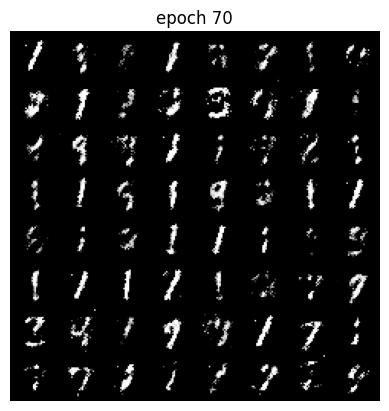

Epoch 70 of 100
Generator loss: 2.78803968, Discriminator loss: 0.55407954


118it [00:10, 10.82it/s]                         


Epoch 71 of 100
Generator loss: 2.59673734, Discriminator loss: 0.63203695


118it [00:11, 10.59it/s]                         


Epoch 72 of 100
Generator loss: 2.62950593, Discriminator loss: 0.60564190


118it [00:10, 10.99it/s]                         


Epoch 73 of 100
Generator loss: 2.55039971, Discriminator loss: 0.61742671


118it [00:10, 10.92it/s]                         


Epoch 74 of 100
Generator loss: 2.68249855, Discriminator loss: 0.63536827


118it [00:10, 11.03it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


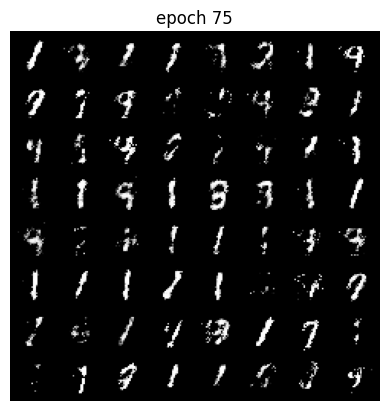

Epoch 75 of 100
Generator loss: 2.42788888, Discriminator loss: 0.60681768


118it [00:10, 11.12it/s]                         


Epoch 76 of 100
Generator loss: 2.54073673, Discriminator loss: 0.57329636


118it [00:10, 11.23it/s]                         


Epoch 77 of 100
Generator loss: 2.60419799, Discriminator loss: 0.62860135


118it [00:10, 11.43it/s]                         


Epoch 78 of 100
Generator loss: 2.43714367, Discriminator loss: 0.64293455


118it [00:10, 11.40it/s]                         


Epoch 79 of 100
Generator loss: 2.61679791, Discriminator loss: 0.57747044


118it [00:10, 11.09it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


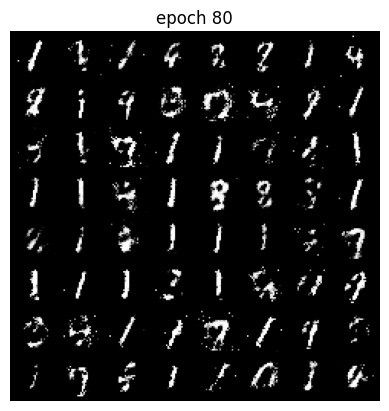

Epoch 80 of 100
Generator loss: 2.45776110, Discriminator loss: 0.61054741


118it [00:10, 11.04it/s]                         


Epoch 81 of 100
Generator loss: 2.42183470, Discriminator loss: 0.68755285


118it [00:10, 11.38it/s]                         


Epoch 82 of 100
Generator loss: 2.18633577, Discriminator loss: 0.70758597


118it [00:10, 10.92it/s]                         


Epoch 83 of 100
Generator loss: 2.25556131, Discriminator loss: 0.68919152


118it [00:10, 11.76it/s]                         


Epoch 84 of 100
Generator loss: 2.19614678, Discriminator loss: 0.74112555


118it [00:10, 11.16it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


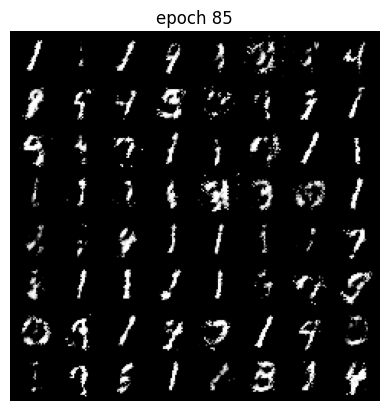

Epoch 85 of 100
Generator loss: 2.29828309, Discriminator loss: 0.67126264


118it [00:10, 11.39it/s]                         


Epoch 86 of 100
Generator loss: 2.30773103, Discriminator loss: 0.67614888


118it [00:10, 11.62it/s]                         


Epoch 87 of 100
Generator loss: 2.24364388, Discriminator loss: 0.68552936


118it [00:09, 11.87it/s]                         


Epoch 88 of 100
Generator loss: 2.19997677, Discriminator loss: 0.69517838


118it [00:10, 11.13it/s]                         


Epoch 89 of 100
Generator loss: 2.09963859, Discriminator loss: 0.75469502


118it [00:10, 11.30it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


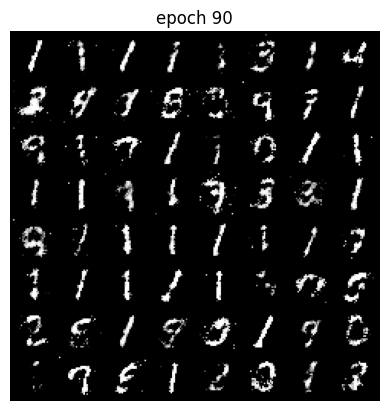

Epoch 90 of 100
Generator loss: 2.11986708, Discriminator loss: 0.74027642


118it [00:10, 11.34it/s]                         


Epoch 91 of 100
Generator loss: 2.13695500, Discriminator loss: 0.73434719


118it [00:10, 11.04it/s]                         


Epoch 92 of 100
Generator loss: 2.13390208, Discriminator loss: 0.73695728


118it [00:10, 11.07it/s]                         


Epoch 93 of 100
Generator loss: 2.04707271, Discriminator loss: 0.79389981


118it [00:10, 11.62it/s]                         


Epoch 94 of 100
Generator loss: 2.08103349, Discriminator loss: 0.74300674


118it [00:10, 11.10it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


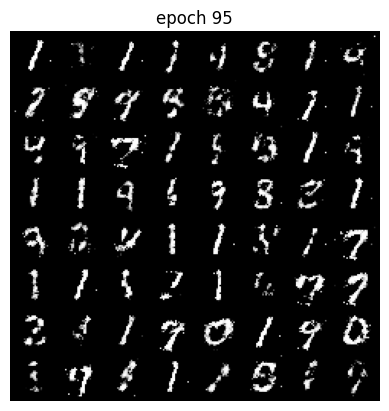

Epoch 95 of 100
Generator loss: 1.99850987, Discriminator loss: 0.78103555


118it [00:10, 11.51it/s]                         


Epoch 96 of 100
Generator loss: 2.03109672, Discriminator loss: 0.79357174


118it [00:10, 11.53it/s]                         


Epoch 97 of 100
Generator loss: 2.02803966, Discriminator loss: 0.76164333


118it [00:10, 11.57it/s]                         


Epoch 98 of 100
Generator loss: 2.06587177, Discriminator loss: 0.77537396


118it [00:10, 11.30it/s]                         


Epoch 99 of 100
Generator loss: 2.08233586, Discriminator loss: 0.75408938


118it [00:10, 11.50it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


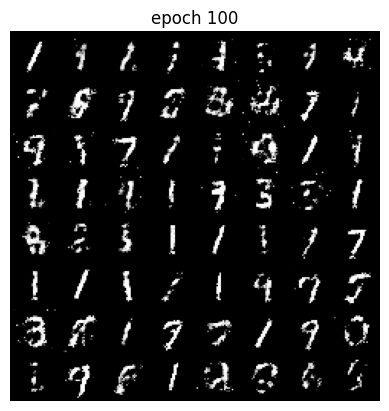

Epoch 100 of 100
Generator loss: 2.05408728, Discriminator loss: 0.74187625


In [48]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    output = output.view(-1, 1)
    return criterion(output, true_label)
    
    
def discriminator_loss(output, true_label):
    output = output.view(-1, 1)
    return criterion(output, true_label)
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        real, _ = data
        real = real.to(device)
        # add noise to real data for smoothing
        noisy_real = real + torch.randn_like(real) * 0.1
        # clamp data to stay in range
        noisy_real = torch.clamp(noisy_real, 0, 1)

        b_size = len(real)
        train_noise = create_noise(b_size, nz)
        fake = generator(train_noise)

        real_label = label_real(b_size)
        fake_label = label_fake(b_size)
        
        # === TRAIN DISCRIMINATOR ===

        # Pass real images
        output = discriminator(real).view(-1)
        d_loss = discriminator_loss(output, real_label)

        # Pass fake images
        output = discriminator(fake.detach()).view(-1)
        d_loss += discriminator_loss(output, fake_label)

        # Backpropagation
        discriminator.zero_grad()
        d_loss.backward()
        optim_d.step()

        # === TRAIN GENERATOR ===

        output = discriminator(fake).view(-1)
        g_loss = generator_loss(output, real_label)
        #g_loss = torch.mean(torch.log(1 - output)) # alternate loss (for descent)

        # Backpropagation
        generator.zero_grad()
        g_loss.backward()
        optim_g.step()

        # Add new losses
        loss_g += g_loss.item()
        loss_d += d_loss.item()
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [49]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [50]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

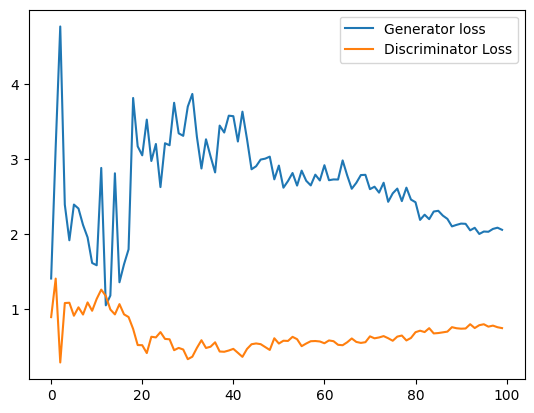

In [51]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')